In [2]:
from src.data.data_setup import loaders

train_loader, valid_loader = loaders(download=False)

In [4]:
train_loader['cifar10']

In [2]:
mnist_train_loader = train_loader['mnist']

In [3]:
for batch in mnist_train_loader:
    x, y = batch
    break

In [4]:
print(x.shape, y.shape)

torch.Size([128, 3, 32, 32]) torch.Size([128])


In [ ]:
import yaml

with open("config.yaml", "r", encoding="utf-8") as f:
    a = yaml.safe_load(f)

print(a)

yaml.safe_dump()

{'project': 'RDKD', 'exp_name': '01_baseline_test', 'seed': 3407, 'device': 'cuda', 'precision': 'fp32', 'output': {'dir': 'runs/${exp_name}/${data.dataset}', 'namefmt': '%Y%m%d_%H%M%S'}, 'data': {'root': 'dataset', 'dataset': 'cifar10', 'batch_size': 128, 'num_workers': 4, 'pin_memory': True, 'download': True, 'aug': {'enable': True, 'cifar': {'random_crop_pad': 4, 'horizontal_flip_p': 0.5, 'cutout': 0}, 'mnist_like': {'random_crop_pad': 0, 'horizontal_flip_p': 0.0}}}, 'model': {'backbone': 'resnet18', 'num_classes': 10, 'ckpts': {'teacher': 'src/model/ckpts/resnet34.pt', 'student': None}, 'load_pretrained': True, 'strict_load': False}, 'train': {'test_every': 1, 'epochs': 100, 'linear_probe': {'enable': True, 'epochs': 20, 'freeze_bn': True}, 'finetune': {'enable': True, 'epochs': 80}, 'optimizer': {'name': 'AdamW', 'lr': 0.0003, 'weight_decay': 0.05, 'betas': [0.9, 0.999], 'eps': 1e-08}, 'scheduler': {'name': 'cosine', 'warmup_epochs': 5, 'min_lr': 1e-06}}, 'logging': {'wandb': Fals

{'epoch': 1, 'time_sec': 57.123282399999994, 'train_loss': 5.812416379089355, 'train_loss_ce': 4.754245143737793, 'train_loss_kd': 6.265918334655762, 'train_acc': 0.06564, 'val_loss': 4.706577142333984, 'val_loss_ce': 4.10061155090332, 'val_loss_kd': 4.966276687240601, 'val_acc': 0.1462, 'lr': 0.00011999999999999999}


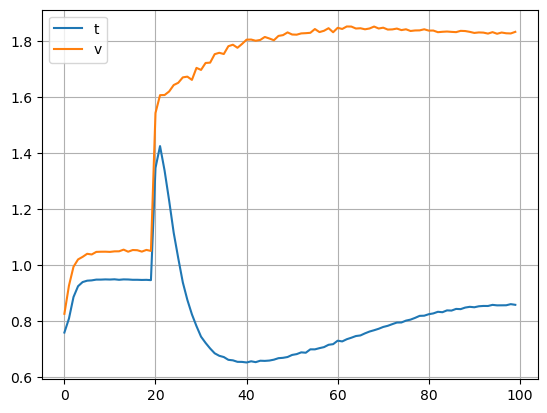

In [ ]:
import json

data = []
with open(r'runs/02_soft_kd/tiny_imagenet/metrics_per_epoch.jsonl', 'r') as f:
    for line in f:
        # 줄바꿈 문자 제거 후 json 파싱
        record = json.loads(line.strip())
        data.append(record)

print(data[0])

t_ratio = []
v_ratio = []
for line in data:
    tce = line['train_loss_ce']
    tkd = line['train_loss_kd']
    vce = line['val_loss_ce']
    vkd = line['val_loss_kd']
    t_ratio.append(tce/tkd)
    v_ratio.append(vce/vkd)

import matplotlib.pyplot as plt
plt.plot(t_ratio, label='t')
plt.plot(v_ratio, label='v')
plt.legend()
plt.grid()
plt.show()

In [6]:
a = data[0]

In [11]:
a

'{"epoch": 1, "time_sec": 57.123282399999994, "train_loss": 5.812416379089355, "train_loss_ce": 4.754245143737793, "train_loss_kd": 6.265918334655762, "train_acc": 0.06564, "val_loss": 4.706577142333984, "val_loss_ce": 4.10061155090332, "val_loss_kd": 4.966276687240601, "val_acc": 0.1462, "lr": 0.00011999999999999999}\n'

In [24]:
datasets = ['cifar10', 'cifar100', 'stl10', 'tiny_imagenet']

root_path = r'runs/_quick_2/'
steps_list = []
metrics_list = []

for dataset in datasets:
    s_path = root_path + dataset + r'/bi_per_step.jsonl'
    m_path = root_path + dataset + r'/metrics_per_epoch.jsonl'

    steps = []
    metrics = []
    with open(s_path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            steps.append(record['b_i'])
    steps_list.append(steps)
    
    with open(m_path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            metrics.append(record)
    metrics_list.append(metrics)

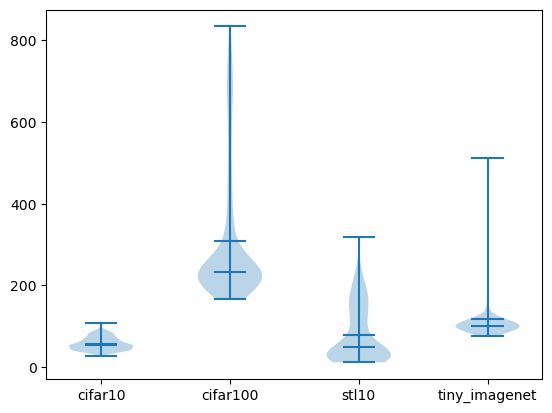

In [20]:
plt.violinplot(steps_list, showmeans=True, showmedians=True)
plt.xticks([1,2,3,4],datasets)
plt.show()



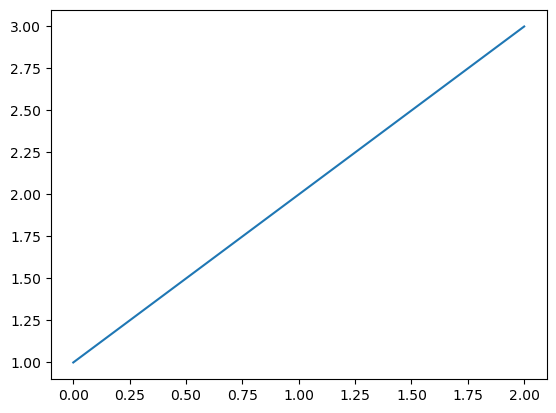

In [17]:
import matplotlib.pyplot as plt

plt.plot([1,2,3])

In [25]:
metrics_list

[[{'epoch': 1,
   'time_sec': 33.274134397506714,
   'train_loss_ce': 1.285982282875139,
   'train_loss_kd': 7.106988977593229,
   'train_loss_base': 5.360686924756336,
   'train_loss_rkd': 0.020899304367430375,
   'b_mean': 75.17765644200318,
   'b_median': 74.54275512695312,
   'b_trimmed_mean': 74.98638568046073,
   'num_steps': 391},
  {'epoch': 2,
   'time_sec': 15.412721157073975,
   'train_loss_ce': 0.8849183500117963,
   'train_loss_kd': 3.7045731239611537,
   'train_loss_base': 2.8586766628353186,
   'train_loss_rkd': 0.01575660617197947,
   'b_mean': 54.39526309625572,
   'b_median': 54.294883728027344,
   'b_trimmed_mean': 54.35331678525584,
   'num_steps': 391},
  {'epoch': 3,
   'time_sec': 15.539408206939697,
   'train_loss_ce': 0.6301069159794341,
   'train_loss_kd': 2.585493865220443,
   'train_loss_base': 1.9988777579553902,
   'train_loss_rkd': 0.014272064451709428,
   'b_mean': 41.94401803955702,
   'b_median': 41.61976623535156,
   'b_trimmed_mean': 41.8607641873886

C:\Users\gauoo\AppData\Local\Temp\ipykernel_67332\3062391385.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


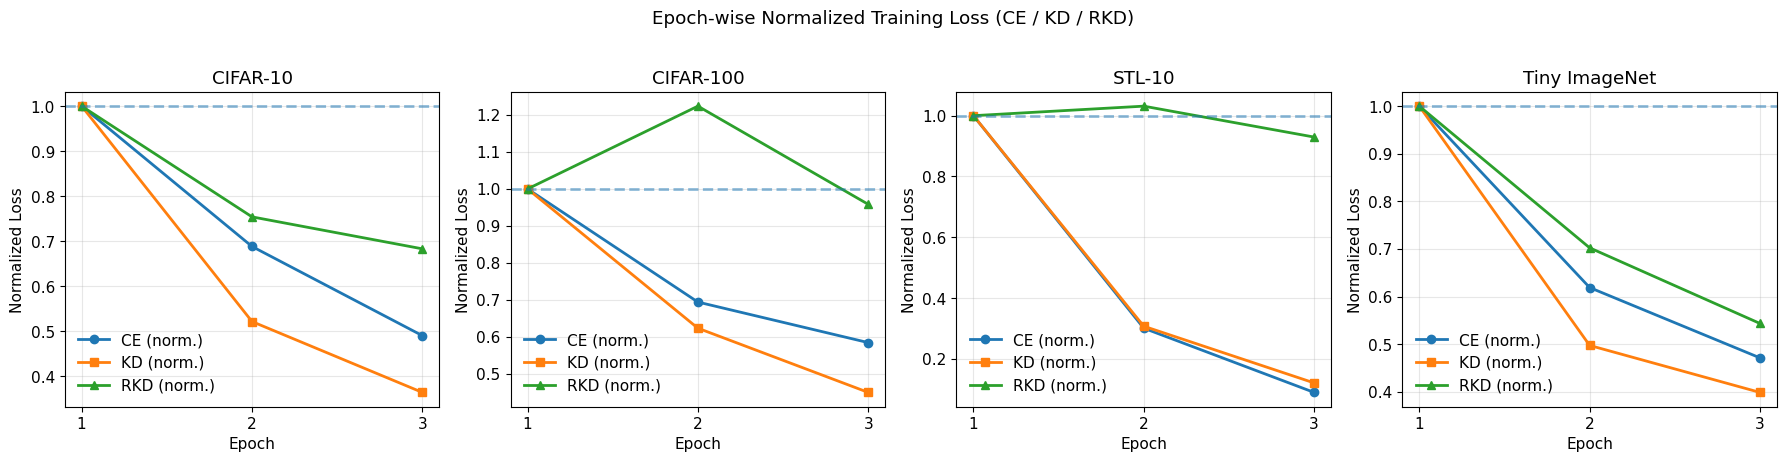

In [32]:
import matplotlib.pyplot as plt

def plot_normalized_losses(metrics_list):
    """
    metrics_list: 길이 4의 리스트
      - 각 원소는 에폭별 딕셔너리 리스트
      - 각 딕셔너리는 'epoch', 'train_loss_ce', 'train_loss_kd', 'train_loss_rkd' 키를 가짐
    """
    assert len(metrics_list) == 4, "metrics_list는 길이 4여야 합니다. (cifar10, cifar100, stl10, tiny imagenet)"
    dataset_names = ["CIFAR-10", "CIFAR-100", "STL-10", "Tiny ImageNet"]

    # 보기 좋은 스타일 몇 가지 설정
    plt.rcParams.update({
        "font.size": 11,
        "axes.grid": True,
        "grid.alpha": 0.3,
        "lines.linewidth": 2.0,
        "legend.frameon": False
    })

    fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=False, constrained_layout=True)

    for ax, metrics, name in zip(axes, metrics_list, dataset_names):
        # 에폭과 원시 값
        epochs = [m["epoch"] for m in metrics]

        ce_vals = [m["train_loss_ce"] for m in metrics]
        kd_vals = [m["train_loss_kd"] for m in metrics]
        rkd_vals = [m["train_loss_rkd"] for m in metrics]

        # epoch=1 기준 정규화(0으로 나눔 방지)
        def _norm(arr):
            base = arr[0]
            if base == 0:
                # 기준값이 0이면 정규화 불가하므로 그대로 반환
                return arr
            return [v / base for v in arr]

        ce_n = _norm(ce_vals)
        kd_n = _norm(kd_vals)
        rkd_n = _norm(rkd_vals)

        # 플롯
        ax.plot(epochs, ce_n, marker="o", label="CE (norm.)")
        ax.plot(epochs, kd_n, marker="s", label="KD (norm.)")
        ax.plot(epochs, rkd_n, marker="^", label="RKD (norm.)")

        # 기준선(y=1) 표시
        ax.axhline(1.0, linestyle="--", alpha=0.5)

        # 축/제목/범례
        ax.set_title(name)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Normalized Loss")
        ax.set_xticks(epochs)
        ax.legend(loc="best")

    fig.suptitle("Epoch-wise Normalized Training Loss (CE / KD / RKD)", y=1.02)
    plt.tight_layout()
    plt.show()


plot_normalized_losses(metrics_list)


C:\Users\gauoo\AppData\Local\Temp\ipykernel_67332\1071720607.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


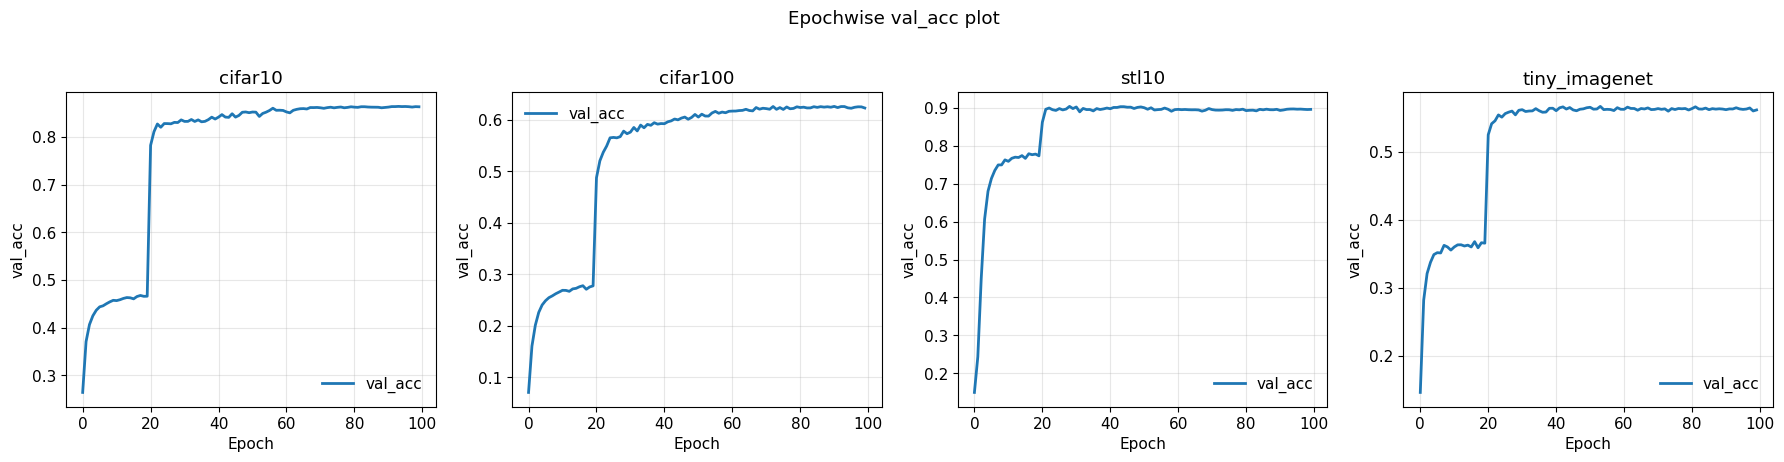

In [42]:
datasets = ['cifar10', 'cifar100', 'stl10', 'tiny_imagenet']
tag = 'val_acc'
# [{"epoch", "time_sec", "train_loss", "train_loss_ce", "train_loss_kd", "train_acc", 
# "val_loss", "val_loss_ce", "val_loss_kd", "val_acc", "lr"]

root_path = r'runs/02_soft_kd/'
lst = []

for dataset in datasets:
    path = root_path + dataset + r'/metrics_per_epoch.jsonl'
    element = []
    with open(path, 'r') as f:
        for line in f:
            # 줄바꿈 문자 제거 후 json 파싱
            record = json.loads(line.strip())
            element.append(record[tag])
    lst.append(element)

# 보기 좋은 스타일 몇 가지 설정
plt.rcParams.update({
    "font.size": 11,
    "axes.grid": True,
    "grid.alpha": 0.3,
    "lines.linewidth": 2.0,
    "legend.frameon": False
})

fig, axes = plt.subplots(1, 4, figsize=(18, 4.5), sharey=False, constrained_layout=True)
epochs = list(range(len(lst[0])))
for ax, element, name in zip(axes, lst, datasets):
    ax.plot(epochs, element, label=tag)
    # 축/제목/범례
    ax.set_title(name)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(tag)
    ax.legend(loc="best")

fig.suptitle(f"Epochwise {tag} plot", y=1.02)
plt.tight_layout()
plt.show()